<h1 style="text-align:center;">NFL Data Bowl 2023 Data EDA</h1>

<p style="text-align:center;">Vincent Etherton -- SML312: Research Projects in Data Science</p>

In [79]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [80]:
file = 'nfl-big-data-bowl-2023/plays.csv'

plays = pd.read_csv(file)

In [81]:
print(plays.columns)

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'foulName1',
       'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3',
       'absoluteYardlineNumber', 'offenseFormation', 'personnelO',
       'defendersInBox', 'personnelD', 'dropBackType', 'pff_playAction',
       'pff_passCoverage', 'pff_passCoverageType'],
      dtype='object')


In the plays dataframe, we have access to relevant play information from both the defensive and offensive perspective.

In [82]:
plays = plays.drop(columns=['penaltyYards', 'foulName1', 'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3'])

plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8557 non-null   int64  
 1   playId                  8557 non-null   int64  
 2   playDescription         8557 non-null   object 
 3   quarter                 8557 non-null   int64  
 4   down                    8557 non-null   int64  
 5   yardsToGo               8557 non-null   int64  
 6   possessionTeam          8557 non-null   object 
 7   defensiveTeam           8557 non-null   object 
 8   yardlineSide            8432 non-null   object 
 9   yardlineNumber          8557 non-null   int64  
 10  gameClock               8557 non-null   object 
 11  preSnapHomeScore        8557 non-null   int64  
 12  preSnapVisitorScore     8557 non-null   int64  
 13  passResult              8557 non-null   object 
 14  prePenaltyPlayResult    8557 non-null   

As we have some columns with null values and seeing as a football play combines various attributes on both the offense and defense, filling in null values with methods like the most common occurrence or the mean doesn't make sense here. We'll just eliminate rows where any column is null.

In [83]:
plays = plays.dropna(subset=['offenseFormation', 'personnelO', 'defendersInBox', 'personnelD', 'absoluteYardlineNumber', 'yardlineSide'])

plays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8425 entries, 0 to 8556
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8425 non-null   int64  
 1   playId                  8425 non-null   int64  
 2   playDescription         8425 non-null   object 
 3   quarter                 8425 non-null   int64  
 4   down                    8425 non-null   int64  
 5   yardsToGo               8425 non-null   int64  
 6   possessionTeam          8425 non-null   object 
 7   defensiveTeam           8425 non-null   object 
 8   yardlineSide            8425 non-null   object 
 9   yardlineNumber          8425 non-null   int64  
 10  gameClock               8425 non-null   object 
 11  preSnapHomeScore        8425 non-null   int64  
 12  preSnapVisitorScore     8425 non-null   int64  
 13  passResult              8425 non-null   object 
 14  prePenaltyPlayResult    8425 non-null   int64

In [84]:
def get_dnd(dn, dis):
    if dn == 1 and dis == 10:
        return "1ST & 10"
    if dn == 1:
        dn_str = "1ST"
    elif dn == 2:
        dn_str = "2ND"
    elif dn == 3:
        dn_str = "3RD"
    else:
        dn_str = "4TH"
    if 1 <= dis <= 3:
        dis_str = "SHORT"
    elif 3 < dis <= 6:
        dis_str = "MED"
    elif 6 < dis <= 10:
        dis_str = "LONG"
    else:
        dis_str = "XL"
        
    return f"{dn_str} & {dis_str}"

We'll add buckets representing down and distance to go to get a first down. Prior to this, down and distance to go were two separate variables. Creating these categorical variables can help us down the line in our EDA and potentially during model building.

In [85]:
plays.insert(6, 'DND', plays.apply(lambda row: get_dnd(row['down'], row['yardsToGo']), axis=1))

In [86]:
plays.dtypes

gameId                      int64
playId                      int64
playDescription            object
quarter                     int64
down                        int64
yardsToGo                   int64
DND                        object
possessionTeam             object
defensiveTeam              object
yardlineSide               object
yardlineNumber              int64
gameClock                  object
preSnapHomeScore            int64
preSnapVisitorScore         int64
passResult                 object
prePenaltyPlayResult        int64
playResult                  int64
absoluteYardlineNumber    float64
offenseFormation           object
personnelO                 object
defendersInBox            float64
personnelD                 object
dropBackType               object
pff_playAction              int64
pff_passCoverage           object
pff_passCoverageType       object
dtype: object

In [87]:
plays.describe()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,prePenaltyPlayResult,playResult,absoluteYardlineNumber,defendersInBox,pff_playAction
count,8.425000e+03,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,2.021098e+09,2158.643205,2.617804,1.967478,8.710861,29.606291,11.674065,11.248309,6.488190,6.548605,59.247359,6.024926,0.237982
std,4.966439e+03,1222.925733,1.132347,0.872518,3.907156,12.352900,9.830043,10.022213,10.176266,10.596302,23.832338,1.004782,0.425873
min,2.021091e+09,54.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-34.000000,-34.000000,11.000000,1.000000,0.000000
25%,2.021092e+09,1126.000000,2.000000,1.000000,6.000000,22.000000,3.000000,3.000000,0.000000,0.000000,39.000000,5.000000,0.000000
50%,2.021100e+09,2156.000000,3.000000,2.000000,10.000000,30.000000,10.000000,10.000000,4.000000,5.000000,58.000000,6.000000,0.000000
75%,2.021102e+09,3196.000000,4.000000,3.000000,10.000000,40.000000,17.000000,17.000000,10.000000,11.000000,79.000000,7.000000,0.000000
max,2.021110e+09,5223.000000,5.000000,4.000000,39.000000,49.000000,54.000000,44.000000,91.000000,91.000000,109.000000,11.000000,1.000000


In [88]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,DND,possessionTeam,defensiveTeam,yardlineSide,...,playResult,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,3RD & SHORT,TB,DAL,TB,...,0,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,1ST & 10,DAL,TB,DAL,...,28,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,2ND & MED,DAL,TB,DAL,...,5,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,1ST & 10,DAL,TB,TB,...,0,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,3RD & XL,DAL,TB,TB,...,0,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [89]:
file = 'nfl-big-data-bowl-2023/games.csv'

games = pd.read_csv(file)

games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


In [90]:
reference_df = plays[['gameId', 'playId']]

reference_df.head()

,gameId,playId
0,2021090900,97
1,2021090900,137
2,2021090900,187
3,2021090900,282
4,2021090900,349


Reference_df contains only the gameId, playId pairs which combined together are unique values during the 2021 season.

In [91]:
weeks = ['week1', 'week2', 'week3', 'week4', 'week5', 'week6', 'week7', 'week8']

dfs = []
for week in weeks:
    file = f'nfl-big-data-bowl-2023/{week}.csv'
    dfs.append(pd.read_csv(file))
    
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118122 entries, 0 to 1118121
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1118122 non-null  int64  
 1   playId         1118122 non-null  int64  
 2   nflId          1069508 non-null  float64
 3   frameId        1118122 non-null  int64  
 4   time           1118122 non-null  object 
 5   jerseyNumber   1069508 non-null  float64
 6   team           1118122 non-null  object 
 7   playDirection  1118122 non-null  object 
 8   x              1118122 non-null  float64
 9   y              1118122 non-null  float64
 10  s              1118122 non-null  float64
 11  a              1118122 non-null  float64
 12  dis            1118122 non-null  float64
 13  o              1069508 non-null  float64
 14  dir            1069508 non-null  float64
 15  event          89585 non-null    object 
dtypes: float64(9), int64(3), object(4)
memory usage: 136.5

We'll merge each week's dataframe with the reference dataframe to ensure that any play we do not have in the plays dataframe is not considered as we don't have play-level information for it.

In [92]:
for idx, df in enumerate(dfs):
    dfs[idx] = df.merge(reference_df, on=['gameId', 'playId'], how='inner')

dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085002 entries, 0 to 1085001
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1085002 non-null  int64  
 1   playId         1085002 non-null  int64  
 2   nflId          1037828 non-null  float64
 3   frameId        1085002 non-null  int64  
 4   time           1085002 non-null  object 
 5   jerseyNumber   1037828 non-null  float64
 6   team           1085002 non-null  object 
 7   playDirection  1085002 non-null  object 
 8   x              1085002 non-null  float64
 9   y              1085002 non-null  float64
 10  s              1085002 non-null  float64
 11  a              1085002 non-null  float64
 12  dis            1085002 non-null  float64
 13  o              1037828 non-null  float64
 14  dir            1037828 non-null  float64
 15  event          87101 non-null    object 
dtypes: float64(9), int64(3), object(4)
memory usage: 132.4

In [93]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,DND,possessionTeam,defensiveTeam,yardlineSide,...,playResult,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,3RD & SHORT,TB,DAL,TB,...,0,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,1ST & 10,DAL,TB,DAL,...,28,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,2ND & MED,DAL,TB,DAL,...,5,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,1ST & 10,DAL,TB,TB,...,0,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,3RD & XL,DAL,TB,TB,...,0,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


['SHOTGUN' 'EMPTY' 'SINGLEBACK' 'I_FORM' 'PISTOL' 'JUMBO' 'WILDCAT']


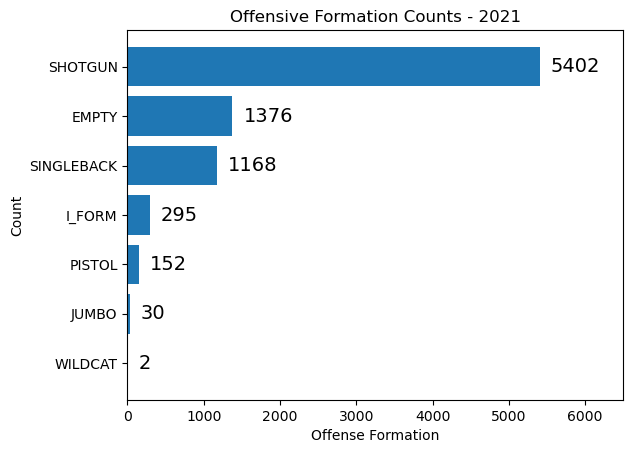

In [94]:
formation_df = plays['offenseFormation'].value_counts().reset_index()

print(formation_df['offenseFormation'].unique())

fig, ax = plt.subplots()

hbars = ax.barh(formation_df['offenseFormation'], formation_df['count'])
ax.set_xlabel('Offense Formation')
ax.set_ylabel('Count')
ax.set_title('Offensive Formation Counts - 2021')
ax.bar_label(hbars, labels=formation_df['count'],
             padding=8, color='black', fontsize=14)
ax.invert_yaxis()
ax.set_xlim(right=6500)
plt.show()

Most of the offensive formations run in this time period of the NFL were out of a shotgun formation, or a formation where the quarter back is 5-7 yards off of the line of scrimmage behind the center. He recieves the snap at the start of the play and is more primed for a pass play than a run play. Once we filter by passing plays, occurances of formations like I-form, pistol, and singleback will surely decrease as these are predominantly run play formations.

In [95]:
downs_df = plays[['DND']].value_counts().reset_index()

downs_df

,DND,count
0,1ST & 10,2706
1,2ND & LONG,1454
2,3RD & LONG,790
3,3RD & MED,682
4,2ND & MED,570
5,2ND & XL,512
6,3RD & SHORT,462
7,3RD & XL,421
8,2ND & SHORT,256
9,1ST & XL,174


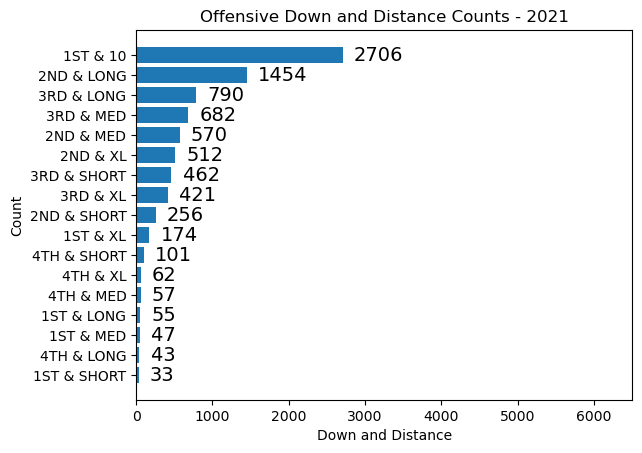

In [96]:
fig, ax = plt.subplots()

hbars = ax.barh(downs_df['DND'], downs_df['count'])
ax.set_xlabel('Down and Distance')
ax.set_ylabel('Count')
ax.set_title('Offensive Down and Distance Counts - 2021')
ax.bar_label(hbars, labels=downs_df['count'],
             padding=8, color='black', fontsize=14)
ax.invert_yaxis()
ax.set_xlim(right=6500)
plt.show()

With some football experience, this figure is quite intuitive. 1st and 10's are experienced much more often than any other down situation as this is the main goal of the offense to get back to 1st down. With only around 500 occurances of important down situations like 3rd & short and 2nd and medium --- situations that I feel are experienced quite frequently by a football offense --- it might be worth considering gathering more data in these situations so we can create more meaningful models.

         personnelO  count
0  1 RB, 1 TE, 3 WR   5664
1  1 RB, 2 TE, 2 WR   1482
2  2 RB, 1 TE, 2 WR    432
3  1 RB, 3 TE, 1 WR    223
4  1 RB, 0 TE, 4 WR    178


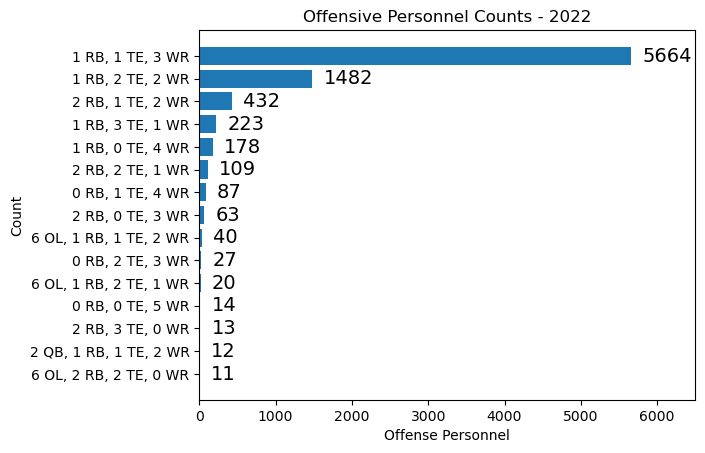

In [97]:
personnel_df = plays['personnelO'].value_counts().reset_index()

print(personnel_df.head())

# remove rare personnel packages ran less than 10 times that season
personnel_df = personnel_df[personnel_df['count'] >= 10]

fig, ax = plt.subplots()

hbars = ax.barh(personnel_df['personnelO'], personnel_df['count'])
ax.set_xlabel('Offense Personnel')
ax.set_ylabel('Count')
ax.set_title('Offensive Personnel Counts - 2022')
ax.bar_label(hbars, labels=personnel_df['count'],
             padding=8, color='black', fontsize=14)
ax.invert_yaxis()
ax.set_xlim(right=6500)
plt.show()

The most common personnel packages in the NFL are 11 personnel (1 RB, 1 TE, and 3 WR) and 12 personnel (1 RB, 2 TE, and 2 WR). 

In [98]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'DND', 'possessionTeam', 'defensiveTeam', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'prePenaltyPlayResult',
       'playResult', 'absoluteYardlineNumber', 'offenseFormation',
       'personnelO', 'defendersInBox', 'personnelD', 'dropBackType',
       'pff_playAction', 'pff_passCoverage', 'pff_passCoverageType'],
      dtype='object')

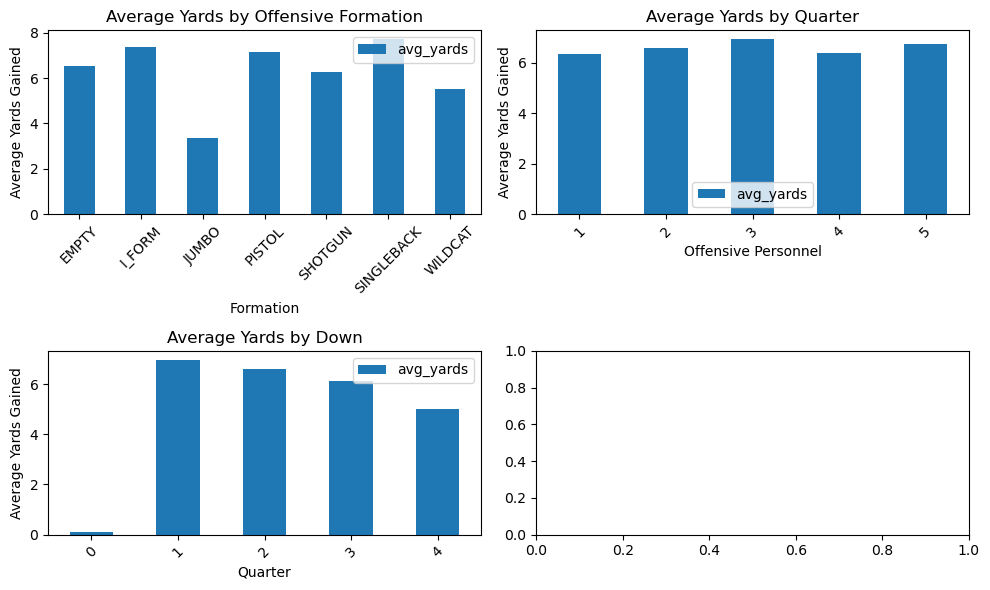

In [99]:
avg_yards_formation = plays.groupby(['offenseFormation']).agg(
    avg_yards=('playResult', 'mean')
).reset_index()

avg_yards_quarter = plays.groupby(['quarter']).agg(
    avg_yards=('playResult', 'mean')
).reset_index()

avg_yards_down = plays.groupby(['down']).agg(
    avg_yards=('playResult', 'mean')
).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

avg_yards_formation.plot(kind='bar', x='offenseFormation', y='avg_yards', ax=axes[0, 0], figsize=(10, 6))
axes[0, 0].set_title('Average Yards by Offensive Formation')
axes[0, 0].set_xlabel('Formation')
axes[0, 0].set_ylabel('Average Yards Gained')
axes[0, 0].tick_params(axis='x', rotation=45)

avg_yards_quarter.plot(kind='bar', x='quarter', y='avg_yards', ax=axes[0, 1], figsize=(10, 6))
axes[0, 1].set_title('Average Yards by Quarter')
axes[0, 1].set_xlabel('Offensive Personnel')
axes[0, 1].set_ylabel('Average Yards Gained')
axes[0, 1].tick_params(axis='x', rotation=45)

avg_yards_down.plot(kind='bar', x='down', y='avg_yards', ax=axes[1, 0], figsize=(10, 6))
axes[1, 0].set_title('Average Yards by Down')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Average Yards Gained')
axes[1, 0].tick_params(axis='x', rotation=45)

plt.tight_layout()


plt.show()

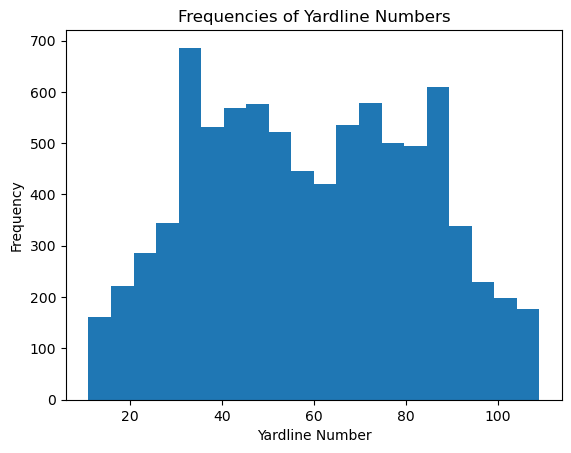

In [100]:
plt.hist(plays['absoluteYardlineNumber'], bins=20)
plt.xlabel('Yardline Number')
plt.ylabel('Frequency')
plt.title('Frequencies of Yardline Numbers')
plt.show()

There is a very spread distribution of absolute yardline numbers which speaks to how far the offense was from the endzone at the start of a given play. This will require standardization if we want to derive any meaningful models from this data.

We'll store the modified dataframes for use in other notebooks in this repository.

In [101]:
plays.to_csv('./updated/playsUpdated.csv', index=False)
for idx, df in enumerate(dfs):
    df.to_csv(f'./updated/Week{idx}Updated.csv', index=False)